In [13]:
import sys;sys.path.append("..")
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [14]:
from devml.post_processing import (git_churn_df, file_len, git_populate_file_metatdata)

In [38]:
df = git_churn_df(path="/Users/noahgift/src/cpython")

2017-10-21 19:34:34,363 - devml.post_processing - INFO - Running churn cmd: [git log --name-only --pretty=format:] at path [/Users/noahgift/src/cpython]


In [39]:
df.head()

,files,churn_count
0,b'Lib/test/test_struct.py',178
1,b'Lib/test/test_zipimport.py',78
2,b'Misc/NEWS.d/next/Core',351
3,b'and',351
4,b'Builtins/2017-10-13-20-01-47.bpo-31781.cXE9S...,1


In [40]:
metadata_df = git_populate_file_metatdata(df)

In [41]:
metadata_df.sort_values(by="churn_count", ascending=False).head(10)

,files,churn_count,line_count,extension,relative_churn
1,b'Misc/NEWS',14464,NaN,,NaN
2,b'Misc/ACKS',1745,1785.0,,0.98
3,b'Objects/unicodeobject.c',1477,15696.0,.c,0.09
4,b'configure',1270,17780.0,,0.07
5,b'Modules/posixmodule.c',1105,13397.0,.c,0.08
6,b'configure.in',1070,NaN,.in,NaN
7,b'Python/ceval.c',963,5246.0,.c,0.18
8,b'Objects/typeobject.c',814,7776.0,.c,0.10
9,b'Makefile.pre.in',807,1719.0,.in,0.47
10,b'Python/import.c',764,2280.0,.c,0.34


In [42]:
metadata_df.median()

churn_count         5.0
line_count        146.0
relative_churn      0.1
dtype: float64

In [43]:
metadata_df.groupby("extension").median()

,churn_count,line_count,relative_churn
extension,,,
,3.0,25.0,0.285
.,3.0,NaN,NaN
.0,1.0,21.0,0.050
.1,2.0,3.0,0.670
.2,3.0,537.0,0.010
.3,4.5,69.0,0.010
.4b3,2.0,NaN,NaN
.586,2.0,NaN,NaN
.686,2.0,NaN,NaN


In [45]:
metadata_df.groupby("extension").describe()

churn_count                                                      \
                    count        mean         std   min    25%    50%     75%   
extension                                                                       
                    668.0   35.248503  566.236073   1.0   2.00    3.0    6.00   
.                     5.0    3.800000    1.303840   3.0   3.00    3.0    4.00   
.0                    8.0    1.250000    0.462910   1.0   1.00    1.0    1.25   
.1                    4.0    2.500000    1.000000   2.0   2.00    2.0    2.50   
.2                    3.0    4.333333    3.214550   2.0   2.50    3.0    5.50   
.3                    8.0    4.250000    2.121320   1.0   2.75    4.5    6.00   
.4b3                  1.0    2.000000         NaN   2.0   2.00    2.0    2.00   
.586                  1.0    2.000000         NaN   2.0   2.00    2.0    2.00   
.686                  1.0    2.000000         NaN   2.0   2.00    2.0    2.00   
.8svx                 1.0    2.000000         NaN   2.0   2.00    2.0    2.00   
.AIX                  1.0    6.000000         NaN   6.0   6.00    6.0    6.00   
.Emacs                1.0    4.000000         NaN   4.0   4.00    4.0    4.00   
.JAGUAR               1.0    2.000000         NaN   2.0   2.00    2.0    2.00   
.LUTZ                 1.0    2.000000         NaN   2.0   2.00    2.0    2.00   
.OpenBSD              1.0    4.000000         NaN   4.0   4.00    4.0    4.00   
.README               2.0    5.000000    4.242641   2.0   3.50    5.0    6.50   
.S                   54.0    6.185185    3.348185   2.0   4.00    6.0    8.00   
.TXT                  4.0    1.000000    0.000000   1.0   1.00    1.0    1.00   
.WINDOWS              1.0    2.000000         NaN   2.0   2.00    2.0    2.00   
.ac                   2.0  136.500000  132.228968  43.0  89.75  136.5  183.25   
.adb                  7.0    2.000000    0.000000   2.0   2.00    2.0    2.00   
.ads                  3.0    2.000000    0.000000   2.0   2.00    2.0    2.00   
.aif                  1.0    3.000000         NaN   3.0   3.00    3.0    3.00   
.aifc                 3.0    1.333333    0.577350   1.0   1.00    1.0    1.50   
.aiff                 5.0    1.200000    0.447214   1.0   1.00    1.0    1.00   
.am                   4.0    8.000000    3.162278   5.0   5.75    7.5    9.75   
.as                   1.0    3.000000         NaN   3.0   3.00    3.0    3.00   
.asdl                 1.0   61.000000         NaN  61.0  61.00   61.0   61.00   
.asm                  8.0    2.750000    2.121320   2.0   2.00    2.0    2.00   
.au                   9.0    2.444444    2.603417   1.0   1.00    1.0    2.00   
...                   ...         ...         ...   ...    ...    ...     ...   
.uue                  4.0    2.000000    0.000000   2.0   2.00    2.0    2.00   
.v1                   1.0    4.000000         NaN   4.0   4.00    4.0    4.00   
.valgrind             1.0    6.000000         NaN   6.0   6.00    6.0    6.00   
.vbs                  2.0    3.000000    1.414214   2.0   2.50    3.0    3.50   
.vcproj             198.0    9.277778   13.521880   1.0   3.00    7.0   10.00   
.vct                  6.0    6.666667    4.546061   2.0   3.00    6.5    8.50   
.vcw                  2.0    3.000000    0.000000   3.0   3.00    3.0    3.00   
.vcxproj             53.0    6.415094    8.321506   1.0   4.00    5.0    7.00   
.vim                  1.0   16.000000         NaN  16.0  16.00   16.0   16.00   
.voc                  1.0    2.000000         NaN   2.0   2.00    2.0    2.00   
.vsprops             43.0    7.837209    7.665415   1.0   3.50    6.0    9.00   
.wav                  5.0    1.200000    0.447214   1.0   1.00    1.0    1.00   
.webp                 1.0    1.000000         NaN   1.0   1.00    1.0    1.00   
.whl                 52.0    1.153846    0.414663   1.0   1.00    1.0    1.00   
.wixproj             28.0    2.535714    1.731669   1.0   2.00    2.0    3.00   
.wml                  1.0    3.000000        

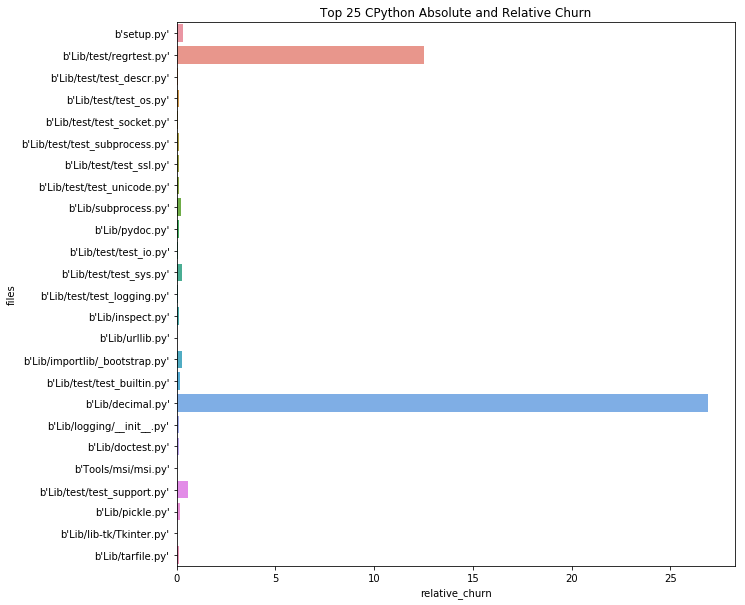

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
python_files = metadata_df[metadata_df.extension == ".py"]
sns.barplot(y="files", x="relative_churn",data=python_files.sort_values(by="churn_count", ascending=False).head(25))
plt.title('Top 25 CPython Absolute and Relative Churn')
plt.show()

In [48]:
python_files = metadata_df[metadata_df.extension == ".py"]
python_files.describe()

,churn_count,line_count,relative_churn
count,4693.000000,1824.000000,1824.000000
mean,19.010228,406.422149,0.236837
std,39.943848,733.784818,0.877692
min,1.000000,1.000000,0.000000
25%,3.000000,52.000000,0.050000
50%,7.000000,169.500000,0.100000
75%,16.000000,427.500000,0.192500
max,720.000000,12990.000000,26.910000


In [54]:
from devml.post_processing import git_deleted_files
deletion_counts = git_deleted_files("/Users/noahgift/src/cpython")

2017-10-21 19:37:17,413 - devml.post_processing - INFO - Running del cmd: [git log --diff-filter=D --summary | grep delete] at path [/Users/noahgift/src/cpython]


In [55]:
all_files = metadata_df['files']
deleted_files = deletion_counts['files']
membership = all_files.isin(deleted_files)

In [56]:
metadata_df["deleted_files"] = membership

In [82]:
metadata_df.loc[metadata_df["deleted_files"] == True].median()

churn_count        4.000
line_count        91.500
relative_churn     0.145
deleted_files      1.000
dtype: float64

In [81]:
metadata_df.loc[metadata_df["deleted_files"] == False].median()

churn_count         9.0
line_count        149.0
relative_churn      0.1
deleted_files       0.0
dtype: float64

In [84]:
metadata_df.count()

files             11695
churn_count       11695
line_count         3885
extension         11695
relative_churn     3885
deleted_files     11695
dtype: int64

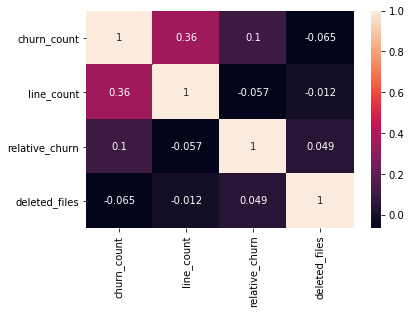

In [88]:
sns.heatmap(metadata_df.corr(), annot=True)